In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/flower_recognition/Dataset.zip -d /content/drive/MyDrive/flower_recognition

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from os import listdir
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings('ignore')
K.clear_session()

In [ ]:
image_size=128
default_image_size = tuple((128, 128))
labels = os.listdir('/content/drive/MyDrive/flower_recognition/Dataset/Train')
directory_root = '/content/drive/MyDrive/flower_recognition/Dataset'
classes = len(labels)
BATCHZ_SIZE=16

In [ ]:
def image_array(dir):
    try:
        img = cv2.imread(dir)
        if img is not None :
            img = cv2.resize(img, default_image_size)
            return img_to_array(img)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
  print("[INFO] Loading images ...")
  root_dir = listdir(directory_root)
  for directory in root_dir :
    # remove .DS_Store from list
    if directory == ".DS_Store" :
      root_dir.remove(directory)
  for classes_folder in root_dir :
    image_classes_folder_list = listdir(f"/content/drive/MyDrive/flower_recognition/Dataset/Train")

  for classes_folder in image_classes_folder_list :
  # remove .DS_Store from list
    if classes_folder == ".DS_Store" :
      image_classes_folder_list.remove(classes_folder)

  for i in listdir('/content/drive/MyDrive/flower_recognition/Dataset'):
    for image_classes_folder in image_classes_folder_list:
      print(f"[INFO] Processing { image_classes_folder} ...")
      image_classes_image_list = listdir(f"{directory_root}/{i}/{ image_classes_folder}/")
      for single_image_classes_image in image_classes_image_list :
        if single_image_classes_image == ".DS_Store" :
          image_classes_image_list.remove(single_image_classes_image)
      for image in image_classes_image_list[:]:
        image_directory = f"{directory_root}/{i}/{ image_classes_folder}/{image}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".jpeg") or image_directory.endswith(".JPEG"):
          image_list.append(image_array(image_directory))
          label_list.append( image_classes_folder)
    print("[INFO] Image loading completed")
except Exception as e:
  print(f"Error : {e}")


[INFO] Loading images ...
[INFO] Processing Sunflower ...
[INFO] Processing Lotus ...
[INFO] Processing Tulip ...
[INFO] Processing Rose ...
[INFO] Processing Jasmine ...
[INFO] Image loading completed
[INFO] Processing Sunflower ...
[INFO] Processing Lotus ...
[INFO] Processing Tulip ...
[INFO] Processing Rose ...
[INFO] Processing Jasmine ...
[INFO] Image loading completed
[INFO] Processing Sunflower ...
[INFO] Processing Lotus ...
[INFO] Processing Tulip ...
[INFO] Processing Rose ...
[INFO] Processing Jasmine ...
[INFO] Image loading completed


In [ ]:
X = image_list
Y = label_list

In [ ]:
X = np.array(X)

In [ ]:
X, Y = shuffle(X, Y)
print(X.shape)

(521, 128, 128, 3)


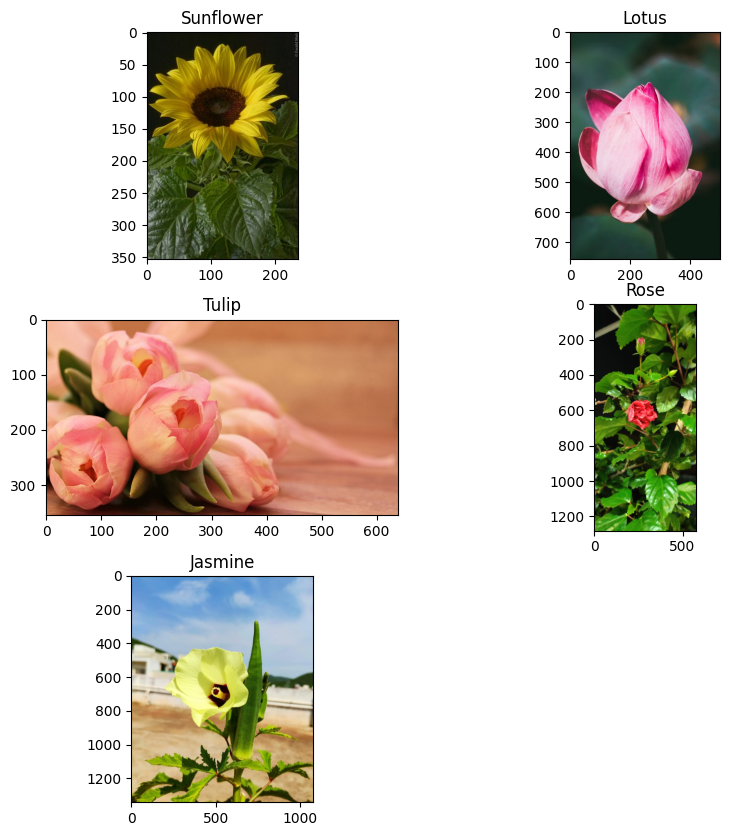

In [ ]:

#Data Visualization
import matplotlib.image as mpimg
plt.figure(figsize = (10, 10))
image_count = 1
BASE_URL = '/content/drive/MyDrive/flower_recognition/Dataset/Train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(3, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(directory)


<Axes: ylabel='count'>

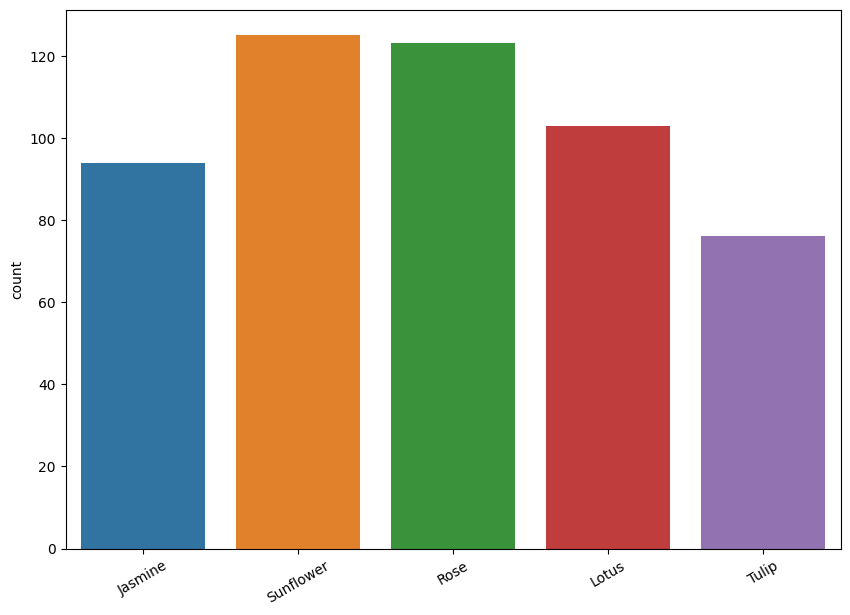

In [ ]:
#count plot
plt.figure(figsize = (10, 7))
plt.xticks(rotation=30)
sns.countplot(x=Y,palette=sns.color_palette())

In [ ]:
#data balancing using smote
X = X.reshape(-1, image_size * image_size * 3)
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
X = X.reshape(-1,image_size,image_size,3)
X.shape

(625, 128, 128, 3)

<Axes: ylabel='count'>

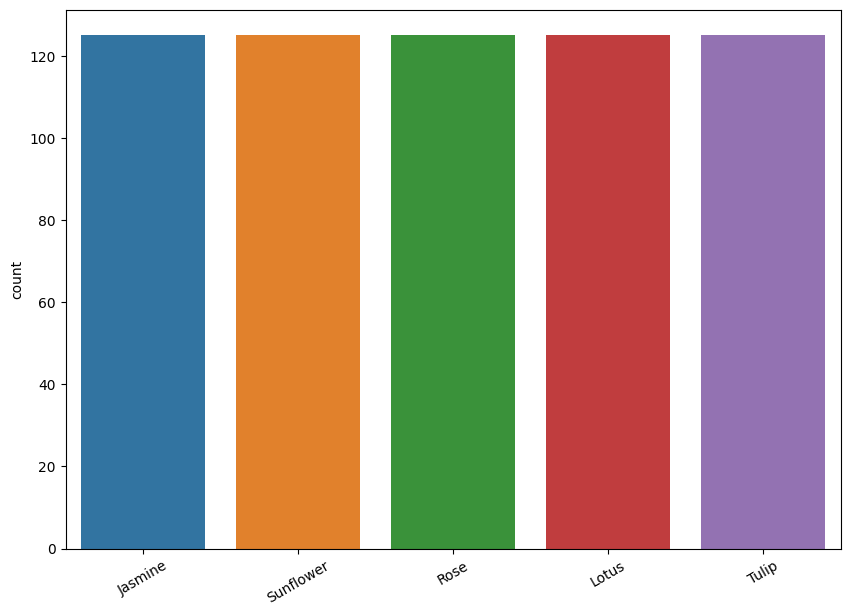

In [ ]:
#count plot after smote
plt.figure(figsize = (10, 7))
plt.xticks(rotation=30)
sns.countplot(x=Y,palette=sns.color_palette())

In [ ]:
class_labels = LabelBinarizer()
Y = class_labels.fit_transform(Y)
pickle.dump(class_labels,open('/content/drive/MyDrive/flower_recognition/label_transform.pkl', 'wb'))
n_classes = len(class_labels.classes_)

In [ ]:
cls = len(class_labels.classes_)
print(class_labels.classes_)

['Jasmine' 'Lotus' 'Rose' 'Sunflower' 'Tulip']


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, stratify=Y)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

# CNN

In [ ]:
#CNN
depth=3
model = Sequential()
inputShape = (image_size,image_size, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth,image_size,image_size)
    chanDim = 1
model.add(Conv2D(64, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(cls))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 128, 128, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 42, 42, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        3

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 26s 1s/step - loss: 2.4722 - accuracy: 0.3168 - val_loss: 4.9486 - val_accuracy: 0.4603
Epoch 2/20
16/16 [==============================] - 24s 1s/step - loss: 1.7268 - accuracy: 0.5109 - val_loss: 5.2675 - val_accuracy: 0.4444
Epoch 3/20
16/16 [==============================] - 23s 1s/step - loss: 1.4395 - accuracy: 0.5921 - val_loss: 2.4336 - val_accuracy: 0.5556
Epoch 4/20
16/16 [==============================] - 23s 1s/step - loss: 1.1422 - accuracy: 0.6079 - val_loss: 2.1579 - val_accuracy: 0.6190
Epoch 5/20
16/16 [==============================] - 24s 2s/step - loss: 1.0354 - accuracy: 0.6653 - val_loss: 1.4966 - val_accuracy: 0.6508
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 0.9147 - accuracy: 0.6970 - val_loss: 1.4980 - val_accuracy: 0.6190
Epoch 7/20
16/16 [==============================] - 24s 1s/step - loss: 0.9669 - accuracy: 0.6851 - val_loss: 1.1576 - val_accuracy: 0.6667
Epoch 8/20
16/16 [==

In [ ]:
#model.save("/content/drive/MyDrive/flower_recognition/Model/Cnn_Model.h5")

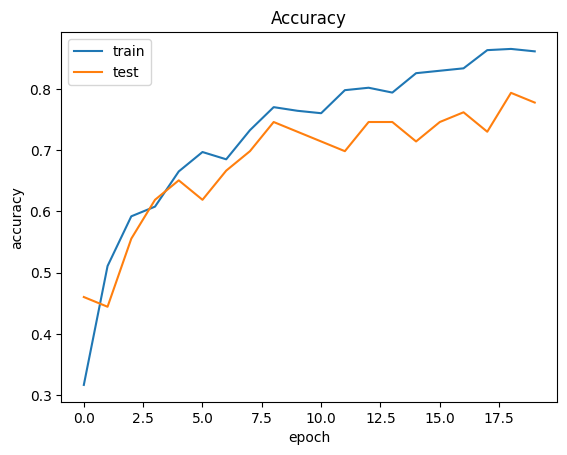

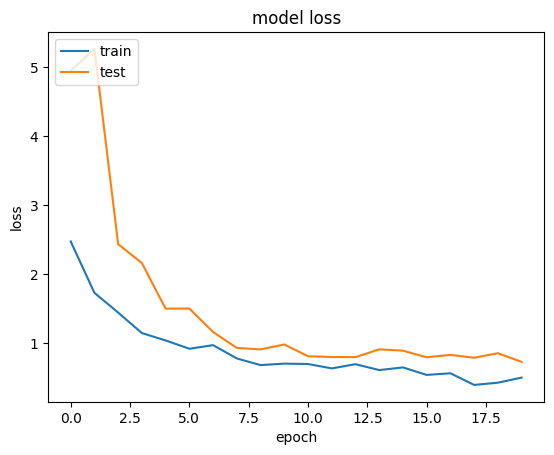

In [ ]:
#accuracy and loss plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

2/2 [==============================] - 1s 353ms/step


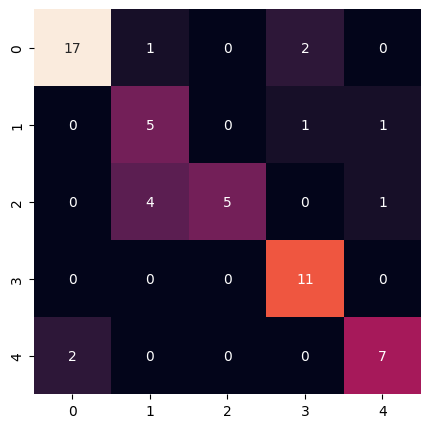

In [ ]:
cmat = confusion_matrix(y_test_new,pred)
plt.figure(figsize=(5,5))
sns.heatmap(cmat, annot = True, cbar = False, fmt='d');

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.50      0.71      0.59         7
           2       1.00      0.50      0.67        10
           3       0.79      1.00      0.88        11
           4       0.78      0.78      0.78         9

    accuracy                           0.79        57
   macro avg       0.79      0.77      0.76        57
weighted avg       0.83      0.79      0.79        57

